# Data import 

In [1]:
import pandas as pd
all_marches = pd.read_csv("FinalSocialMedia.csv")
all_marches

,City_State,State,Country,Low,Average,High
0,"Abilene, TX",TX,US,200,200,200
1,"Accident, MD",MD,US,54,54,54
2,"Adak, AK",AK,US,10,10,10
3,"Adrian, MI",MI,US,150,150,150
4,"Ajo, AZ",AZ,US,250,250,250
...,...,...,...,...,...,...
670,"Yellow Springs, OH",OH,US,250,250,250
671,"Ypsilanti, MI",MI,US,"1,200",1200,"1,200"
672,"Yucca Valley, CA",CA,US,76,138,200
673,"Yuma, AZ",AZ,US,10,10,10


# Data cleaning

In [2]:
all_marches.isnull().sum()

City_State     0
State          2
Country        0
Low           44
Average       46
High          44
dtype: int64

In [9]:
all_marches[all_marches['State'].isnull()]

,City_State,State,Country,Low,Average,High


In [17]:
#all_marches = all_marches.drop([149, 668], axis=0)
#all_marches.isnull().sum()

In [11]:
low_null = all_marches[~all_marches['Low'].isnull()]
low_null.isnull().sum()

City_State    0
State         0
Country       0
Low           0
Average       2
High          0
dtype: int64

In [12]:
low_null = all_marches[~all_marches['Average'].isnull()]
low_null.isnull().sum()

City_State    0
State         0
Country       0
Low           0
Average       0
High          0
dtype: int64

In [6]:
sm_marches = all_marches[~all_marches['Average'].isnull()]
sm_marches.isnull().sum()

City_State    0
State         0
Country       0
Low           0
Average       0
High          0
dtype: int64

In [13]:
sm_marches.head()

,City_State,State,Country,Low,Average,High
0,"Abilene, TX",TX,US,200,200,200
1,"Accident, MD",MD,US,54,54,54
2,"Adak, AK",AK,US,10,10,10
3,"Adrian, MI",MI,US,150,150,150
4,"Ajo, AZ",AZ,US,250,250,250


In [14]:
sm_gc = pd.read_csv("sm_marches_geocodio.csv")
wiki_gc = pd.read_csv("FinalWiki_geocodio.csv")
sm_gc.head()

,City_State,State,Country,Low,Average,High,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State.1,County,Zip,Country.1,Source
0,"Abilene, TX",TX,US,200,200,200,32.576489,-99.665323,1.0,place,NaN,NaN,NaN,NaN,Abilene,TX,Taylor County,79601.0,US,TIGER/Line® dataset from the US Census Bureau
1,"Accident, MD",MD,US,54,54,54,39.628700,-79.319760,1.0,place,NaN,NaN,NaN,NaN,Accident,MD,Garrett County,21520.0,US,TIGER/Line® dataset from the US Census Bureau
2,"Adak, AK",AK,US,10,10,10,51.829438,-176.629994,1.0,place,NaN,NaN,NaN,NaN,Adak,AK,Aleutians West Census Area,99546.0,US,TIGER/Line® dataset from the US Census Bureau
3,"Adrian, MI",MI,US,150,150,150,41.889943,-84.065892,1.0,place,NaN,NaN,NaN,NaN,Adrian,MI,Lenawee County,49221.0,US,TIGER/Line® dataset from the US Census Bureau
4,"Ajo, AZ",AZ,US,250,250,250,32.384890,-112.890110,1.0,place,NaN,NaN,NaN,NaN,Ajo,AZ,Pima County,85321.0,US,TIGER/Line® dataset from the US Census Bureau


# Data processing

In [16]:
sm_count = len(sm_gc[sm_gc['Accuracy Score'] < 1.00][['City_State', 'City', 'State.1', 'Latitude', 'Longitude']])
wiki_count = len(wiki_gc[wiki_gc['Accuracy Score'] < 1.00][['State', 'City', 'City.1', 'State.1', 'Latitude', 'Longitude']])
print(sm_count)
print(wiki_count)

32
15


In [51]:
sm_replace_dict = {
    15: [30.6266, 81.4609],
    70: [37.191807, -108.078634],
    78: [42.914664, -78.864897],
    97: [37.555616, -76.304590],
    159: [35.047669, -108.323769],
    234: [48.199181, -120.773236],
    242: [39.245103, -76.914071],
    326: [39.956147, -74.922647],
    331: [41.379763, -70.649143],
    376: [30.013898, -90.013031],
    475: [17.716221, -64.831193],
    513: [46.486260, -84.355558],
    528: [32.459338, -93.769839],
    539: [38.978815, -119.932676],
    573: [44.224584, -74.462409],
    581: [43.095693, -75.229880]}
sm_drop = [238]

for k,v in sm_replace_dict.items():
    sm_gc.at[k, 'Latitude'] = v[0]
    sm_gc.at[k, 'Longitude'] = v[1]

for i in sm_drop:
    sm_gc = sm_gc.drop(i, axis=0)

KeyError: '[238] not found in axis'

In [53]:
wiki_replace_dict = {
    15: [30.6266, 81.4609],
    70: [37.191807, -108.078634],
    78: [42.914664, -78.864897],
    97: [37.555616, -76.304590],
    159: [35.047669, -108.323769],
    234: [48.199181, -120.773236],
    242: [39.245103, -76.914071],
    326: [39.956147, -74.922647],
    331: [41.379763, -70.649143],
    376: [30.013898, -90.013031],
    475: [17.716221, -64.831193],
    513: [46.486260, -84.355558],
    528: [32.459338, -93.769839],
    539: [38.978815, -119.932676],
    573: [44.224584, -74.462409],
    581: [43.095693, -75.229880]}
wiki_drop = [238]
for k,v in wiki_replace_dict.items():
    wiki_gc.at[k, 'Latitude'] = v[0]
    wiki_gc.at[k, 'Longitude'] = v[1]

for i in wiki_drop:
    wiki_gc = wiki_gc.drop(i, axis=0)

In [54]:
sm_keep_cols = ['City_State', 'State', 'Average', 'Latitude', 'Longitude']
wiki_keep_cols = ['City', 'State', 'Turnout', 'Latitude', 'Longitude']

sm_ds = sm_gc[sm_keep_cols]
wiki_ds = wiki_gc[wiki_keep_cols]

In [55]:
wiki_ds['Turnout'] = pd.to_numeric(wiki_ds['Turnout'])
sm_ds['Average'] = pd.to_numeric(sm_ds['Average'].str.replace(",", ""))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
print(len(sm_ds))
print(len(wiki_ds))

628
512


In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

Text(0, 0.5, 'Turnout')

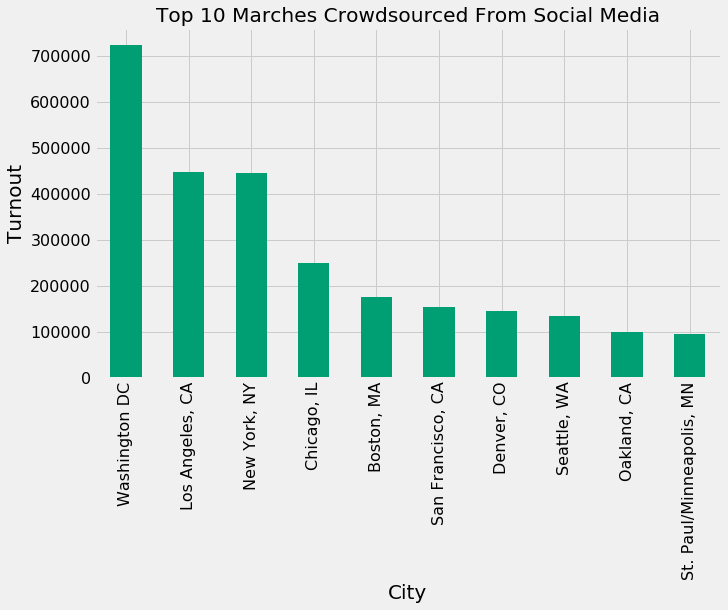

In [84]:
colors = [[0,158/255,115/255]]
sm_top_10_plot = sm_ds.sort_values(by='Average', ascending=False)[0:10].plot(x='City_State', y='Average', kind='bar', figsize = (10,6), fontsize=16, color=colors)
sm_top_10_plot.legend_.remove()

sm_top_10_plot.set_title("Top 10 Marches Crowdsourced From Social Media")
sm_top_10_plot.set_xlabel('City', fontsize=20)
sm_top_10_plot.set_ylabel('Turnout', fontsize=20)

Text(0.5, 0, 'Turnout')

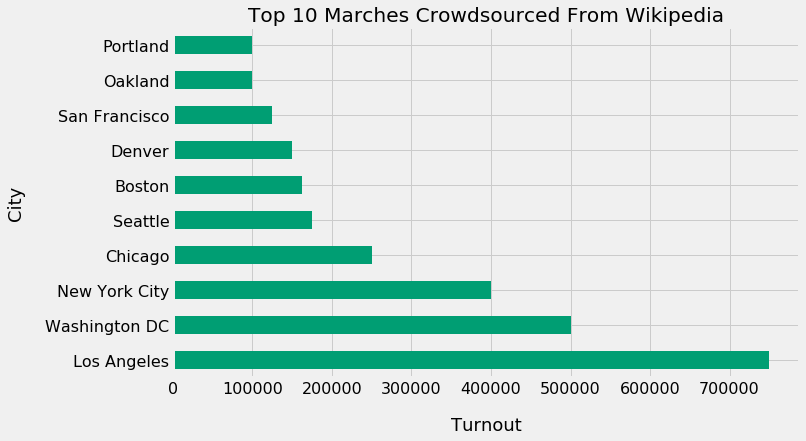

In [87]:
wiki_top_10_plot = wiki_ds.sort_values(by='Turnout', ascending=False)[0:10].plot(x='City', y='Turnout', kind='barh', figsize = (10,6), fontsize=16, color=colors)
wiki_top_10_plot.legend_.remove()

wiki_top_10_plot.set_title("Top 10 Marches Crowdsourced From Wikipedia")
wiki_top_10_plot.set_ylabel('City', fontsize=18, labelpad=20)
wiki_top_10_plot.set_xlabel('Turnout', fontsize=18, labelpad=20)


In [89]:
wiki_ds[~wiki_ds['State'].isin(state_names)]

,City,State,Turnout,Latitude,Longitude
150,Hagåtña,Guam,100.0,0.000000,0.000000
389,Mayaguez,Puerto Rico,0.0,18.181938,-67.133802
390,San Juan,Puerto Rico,0.0,18.465901,-66.103568
391,Santurce,Puerto Rico,0.0,18.452679,-66.078113
392,Vieques,Puerto Rico,200.0,18.123347,-65.460356
430,St. Croix,United States Virgin Islands,500.0,0.000000,0.000000
431,St. John,United States Virgin Islands,200.0,0.000000,0.000000
432,St. Thomas,United States Virgin Islands,300.0,0.000000,0.000000
484,Washington DC,Washington DC,500000.0,38.911936,-77.016719
513,NaN,NaN,NaN,46.486260,-84.355558


In [90]:
sm_ds = sm_ds.drop([102, 131, 168, 219, 475, 477, 500, 591])
wiki_ds = wiki_ds.drop([263, 390, 401, 430, 431, 438, 474])

wiki_ds.at[479, "City"] = "Washington"
wiki_ds.at[479, "State"] = "District Of Columbia"

In [91]:
sm_ds['State_Codes'] = sm_ds['State']
sm_ds['State_Names'] = ""

for key, row in sm_ds.iterrows():
    list_index = 0
    current_code = row['State_Codes']
    for counter, name in enumerate(state_codes):
        if name == current_code:
            list_index = counter
    sm_ds.at[key, 'State_Names'] = state_names[list_index]

wiki_ds['State_Names'] = wiki_ds['State']
wiki_ds['State_Codes'] = ""

for key, row in wiki_ds.iterrows():
    list_index = 0
    current_name = row['State_Names']
    for counter, name in enumerate(state_names):
        if name == current_name:
            list_index = counter
    wiki_ds.at[key, 'State_Codes'] = state_codes[list_index]

In [92]:
sm_ds

,City_State,State,Average,Latitude,Longitude,State_Codes,State_Names
0,"Abilene, TX",TX,200.0,32.576489,-99.665323,TX,Texas
1,"Accident, MD",MD,54.0,39.628700,-79.319760,MD,Maryland
2,"Adak, AK",AK,10.0,51.829438,-176.629994,AK,Alaska
3,"Adrian, MI",MI,150.0,41.889943,-84.065892,MI,Michigan
4,"Ajo, AZ",AZ,250.0,32.384890,-112.890110,AZ,Arizona
...,...,...,...,...,...,...,...
624,"Yellow Springs, OH",OH,250.0,39.806450,-83.886870,OH,Ohio
625,"Ypsilanti, MI",MI,1200.0,42.202139,-83.620494,MI,Michigan
626,"Yucca Valley, CA",CA,138.0,34.185894,-116.432416,CA,California
627,"Yuma, AZ",AZ,10.0,32.701461,-114.657232,AZ,Arizona


In [94]:
wiki_ds['City_State'] = wiki_ds ['City'] + ', ' + wiki_ds['State_Codes']

Text(0.5, 1.0, 'Top 10 Marches Crowdsourced From Wikipedia \n')

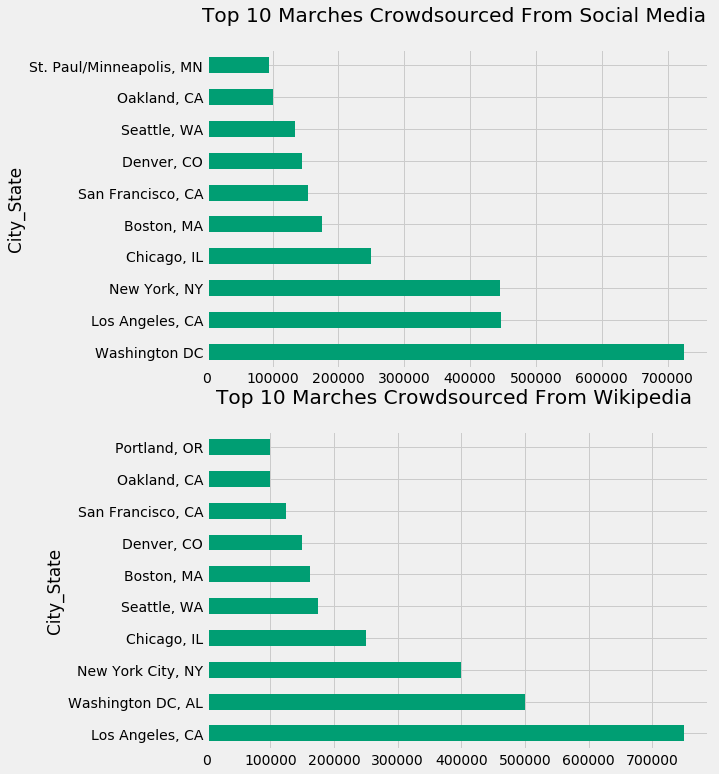

In [95]:
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sm_top_10_plot = sm_ds.sort_values(by='Average', ascending=False)[0:10].plot(x='City_State', y='Average', kind='barh', ax=ax1, color=colors)
wiki_ds.sort_values(by='Turnout', ascending=False)[0:10].plot(x='City_State', y='Turnout', kind='barh', ax=ax2, color=colors)

ax1.legend_.remove()
ax1.set_title("Top 10 Marches Crowdsourced From Social Media \n")

ax2.legend_.remove()
ax2.set_title("Top 10 Marches Crowdsourced From Wikipedia \n")

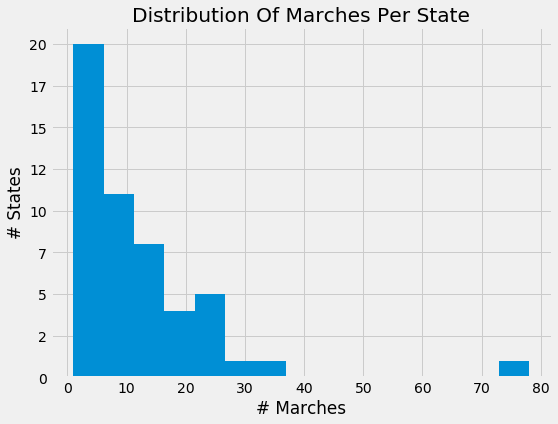

In [96]:
sm_state_hist = sm_ds['State_Names'].value_counts().plot(kind='hist', figsize=(8,6), bins=15, title="Distribution Of Marches Per State")
sm_state_hist.set_xlabel("# Marches")
sm_state_hist.set_ylabel("# States")

y_labels = [int(item) for item in sm_state_hist.get_yticks().tolist()]
sm_state_hist.set_yticklabels(y_labels)

plt.savefig("sm_state_hist.png", bbox_inches="tight")

[Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '25'),
 Text(0, 0, '30')]

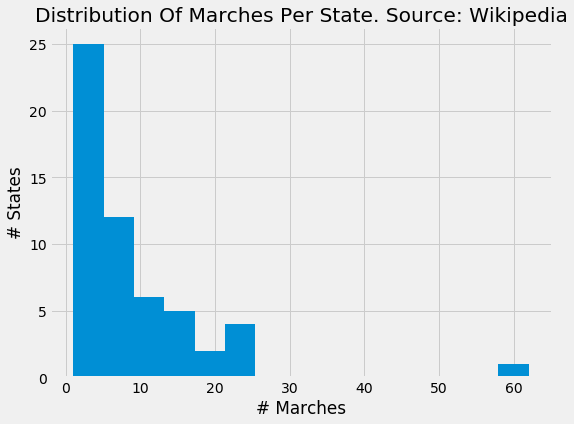

In [98]:
wiki_state_hist = wiki_ds['State_Names'].value_counts().plot(kind='hist', figsize=(8,6), bins=15, title="Distribution Of Marches Per State. Source: Wikipedia")
wiki_state_hist.set_xlabel("# Marches")

wiki_state_hist.set_ylabel("# States")
y_labels = [int(item) for item in wiki_state_hist.get_yticks().tolist()]
wiki_state_hist.set_yticklabels(y_labels)

In [99]:
print("State with the most # of marches:", sm_ds['State_Names'].value_counts().index[0])

State with the most # of marches: California


In [100]:
sm_ds.groupby('State_Names').agg(['count', 'sum'])['Average'].sort_values('count', ascending=False)[0:15]

,count,sum
State_Names,,
California,78,910830.25
Washington,33,172981.00
New York,28,496782.40
Colorado,25,162287.00
Alaska,25,10124.60
Oregon,25,116497.75
Pennsylvania,24,86757.05
Michigan,22,46843.15
Florida,21,91717.15


In [101]:
wiki_ds.groupby('State_Names').agg(['count', 'sum'])['Turnout'].sort_values('sum', ascending=False)[0:15]

,count,sum
State_Names,,
California,62,1184930.0
Washington DC,1,500000.0
New York,25,452916.0
Illinois,9,260595.0
Washington,25,212743.0
Massachusetts,10,169553.0
Colorado,16,162349.0
Oregon,24,127856.0
Minnesota,12,98274.0


In [104]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import HeatMap

# Map obj
map_clusters = folium.Map()
data = sm_ds[['Latitude', 'Longitude']].values
MarkerCluster(data).add_to(map_clusters)

map_clusters

In [105]:
sm_ds


,City_State,State,Average,Latitude,Longitude,State_Codes,State_Names
0,"Abilene, TX",TX,200.0,32.576489,-99.665323,TX,Texas
1,"Accident, MD",MD,54.0,39.628700,-79.319760,MD,Maryland
2,"Adak, AK",AK,10.0,51.829438,-176.629994,AK,Alaska
3,"Adrian, MI",MI,150.0,41.889943,-84.065892,MI,Michigan
4,"Ajo, AZ",AZ,250.0,32.384890,-112.890110,AZ,Arizona
...,...,...,...,...,...,...,...
624,"Yellow Springs, OH",OH,250.0,39.806450,-83.886870,OH,Ohio
625,"Ypsilanti, MI",MI,1200.0,42.202139,-83.620494,MI,Michigan
626,"Yucca Valley, CA",CA,138.0,34.185894,-116.432416,CA,California
627,"Yuma, AZ",AZ,10.0,32.701461,-114.657232,AZ,Arizona


In [106]:
sm_ds.to_csv('explore.csv')